In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import backend as K
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import utils
import tensorflow as tf
import numpy as np
import pandas as pd

In [3]:
FEED_INFO_PATH = "my_data/my_info.csv"

my_feed_info = pd.read_csv(FEED_INFO_PATH, header=0, index_col=None)
feed_feature = my_feed_info.columns

In [4]:
author_data = my_feed_info['authorid'].values
videoplaysec_data = my_feed_info['videoplayseconds'].values
song_data = my_feed_info['bgm_song_id'].values
singer_data = my_feed_info['bgm_singer_id'].values
tag_data = my_feed_info['manual_tag_list'].values

In [5]:
i_author_input = layers.Input(shape=(None, ), dtype='int32', name='i_author_input')
dis_author_input = layers.Input(shape=(None, ), dtype='int32', name='dis_author_input')
recom_author_input = layers.Input(shape=(1, ), dtype='int32', name='recom_author_input')

author_encoder = preprocessing.IntegerLookup(num_oov_indices=0, mask_value=-1, name='author_lookup')
author_encoder.adapt(author_data.astype(np.int32))

i_author_enco = author_encoder(i_author_input)
dis_author_enco = author_encoder(dis_author_input)
recom_author_enco = author_encoder(recom_author_input)

author_emb_layer = layers.Embedding(input_dim=len(author_encoder.get_vocabulary()), output_dim=32,
                                    mask_zero=True, name='author_embedding_layer')

i_author_emb = author_emb_layer(i_author_enco)
dis_author_emb = author_emb_layer(dis_author_enco)
recom_authot_emb = author_emb_layer(recom_author_enco)

Author_Embedding = models.Model(inputs=[i_author_input, dis_author_input, recom_author_input],
                                outputs=[i_author_emb, dis_author_emb, recom_authot_emb],
                                name='Author_Embedding')

In [6]:

i_song_input = layers.Input(shape=(None, ), dtype='int32', name='i_song_input')
dis_song_input = layers.Input(shape=(None, ), dtype='int32', name='dis_song_input')
recom_song_input = layers.Input(shape=(1, ), dtype='int32', name='recom_song_input')

song_encoder = preprocessing.IntegerLookup(num_oov_indices=0, mask_value=-1, name='song_lookup')
song_encoder.adapt(song_data.astype(np.int32))

i_song_enco = song_encoder(i_song_input)
dis_song_enco = song_encoder(dis_song_input)
recom_song_enco = song_encoder(recom_song_input)

song_emb_layer = layers.Embedding(input_dim=len(song_encoder.get_vocabulary()), output_dim=32,
                                  mask_zero=True, name='song_embedding_layer')

i_song_emb = song_emb_layer(i_song_enco)
dis_song_emb = song_emb_layer(dis_song_enco)
recom_song_emb = song_emb_layer(recom_song_enco)

Song_Embedding = models.Model(inputs=[i_song_input, dis_song_input, recom_song_input],
                              outputs=[i_song_emb, dis_song_emb, recom_song_emb],
                              name='Song_Embedding')

Model: "Psec_Embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i_psec_input (InputLayer)       [(None, None)]       0                                            
__________________________________________________________________________________________________
dis_psec_input (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
recom_psec_input (InputLayer)   [(None, 1)]          0                                            
__________________________________________________________________________________________________
psec_encoder (IntegerLookup)    multiple             0           i_psec_input[0][0]               
                                                                 dis_psec_input[0][0]

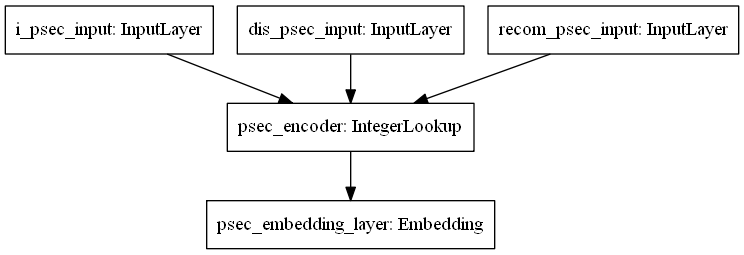

In [7]:
i_singer_input = layers.Input(shape=(None, ), dtype='int32', name='i_singer')
dis_singer_input = layers.Input(shape=(None, ), dtype='int32', name='dis_singer')
recom_singer_input = layers.Input(shape=(1, ), dtype='int32', name='recom_singer')

singer_encoder = preprocessing.IntegerLookup(num_oov_indices=0, mask_value=-1, name='singer_encoder')
singer_encoder.adapt(singer_data.astype(np.int32))

i_singer_enco = singer_encoder(i_singer_input)
dis_singer_enco = singer_encoder(dis_singer_input)
recom_singer_enco = singer_encoder(recom_singer_input)

singer_emb_layer = layers.Embedding(input_dim=len(singer_encoder.get_vocabulary()), output_dim=32,
                                    mask_zero=True, name='singer_embedding_layer')

i_singer_emb = singer_emb_layer(i_singer_enco)
dis_singer_emb = singer_emb_layer(dis_singer_enco)
recom_singer_emb = singer_emb_layer(recom_singer_enco)

Singer_Embedding = models.Model(inputs=[i_singer_input, dis_singer_input, recom_singer_input],
                                outputs=[i_singer_emb, dis_singer_emb, recom_singer_emb],
                                name='Singer_Embedding')

In [8]:
i_psec_input = layers.Input(shape=(None, ), dtype='int32', name='i_psec_input')
dis_psec_input = layers.Input(shape=(None, ), dtype='int32', name='dis_psec_input')
recom_psec_input = layers.Input(shape=(1, ), dtype='int32', name='recom_psec_input')

psec_encoder = preprocessing.IntegerLookup(num_oov_indices=0, mask_value=-1, name='psec_encoder')
psec_encoder.adapt(videoplaysec_data.astype(np.int32))

i_psec_enco = psec_encoder(i_psec_input)
dis_psec_enco = psec_encoder(dis_psec_input)
recom_psec_enco = psec_encoder(recom_psec_input)

psec_emb_layer =layers.Embedding(input_dim=len(psec_encoder.get_vocabulary()), output_dim=4,
                                 mask_zero=True, name='psec_embedding_layer')

i_psec_emb = psec_emb_layer(i_psec_enco)
dis_psec_emb = psec_emb_layer(dis_psec_enco)
recom_psec_emb = psec_emb_layer(recom_psec_enco)

Psec_Embedding = models.Model(inputs=[i_psec_input, dis_psec_input, recom_psec_input],
                              outputs=[i_psec_emb, dis_psec_emb, recom_psec_emb],
                              name='Psec_Embedding')

Model: "Tag_Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i_tag_input (InputLayer)        [(None, None, 351)]  0                                            
__________________________________________________________________________________________________
dis_tag_input (InputLayer)      [(None, None, 351)]  0                                            
__________________________________________________________________________________________________
tag_mask (Masking)              (None, None, 351)    0           i_tag_input[0][0]                
                                                                 dis_tag_input[0][0]              
__________________________________________________________________________________________________
recom_tag_input (InputLayer)    [(None, 1, 351)]     0                                  

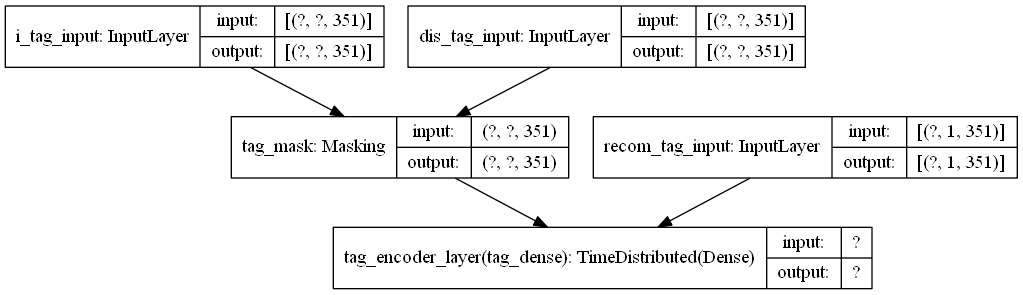

In [9]:
tag_token = preprocessing.TextVectorization(output_mode='binary')
tag_token.adapt(tag_data)
tag_vocabulary = tag_token.get_vocabulary()

Model: "Feed_Embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ifeed_emb_input (InputLayer)    [(None, None, 512)]  0                                            
__________________________________________________________________________________________________
disfeed_emb_input (InputLayer)  [(None, None, 512)]  0                                            
__________________________________________________________________________________________________
feed_emb_mask (Masking)         (None, None, 512)    0           ifeed_emb_input[0][0]            
                                                                 disfeed_emb_input[0][0]          
__________________________________________________________________________________________________
recomfeed_emb_input (InputLayer [(None, 1, 512)]     0                               

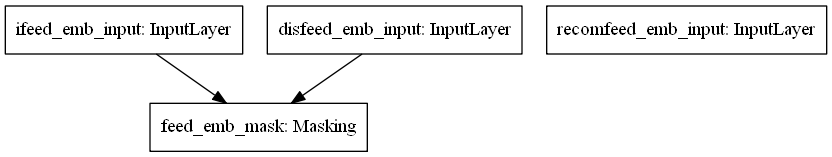

In [10]:
i_tag_input = layers.Input(shape=(None, len(tag_vocabulary)), dtype='int16', name='i_tag_input')
dis_tag_input = layers.Input(shape=(None, len(tag_vocabulary)), dtype='int16', name='dis_tag_input')
recom_tag_input = layers.Input(shape=(1, len(tag_vocabulary)), dtype='int16', name='recom_tag_input')

tag_mask = layers.Masking(mask_value=0, name='tag_mask')

i_tag_mask = tag_mask(i_tag_input)
dis_tag_mask = tag_mask(dis_tag_input)

tag_encoder = layers.TimeDistributed(layers.Dense(units=8, use_bias=False, name='tag_dense'), name='tag_encoder_layer')

i_tag_enco = tag_encoder(i_tag_mask)
dis_tag_enco = tag_encoder(dis_tag_mask)
recom_tag_enco = tag_encoder(recom_tag_input)

Tag_Encoder = models.Model(inputs=[i_tag_input, dis_tag_input, recom_tag_input],
                           outputs=[i_tag_enco, dis_tag_enco, recom_tag_enco],
                           name='Tag_Encoder')

In [11]:
FEED_EMBEDDING_LEN = 512
ifeed_emb_input = layers.Input(shape=(None, FEED_EMBEDDING_LEN), dtype='float32', name='ifeed_emb_input')
disfeed_emb_input = layers.Input(shape=(None, FEED_EMBEDDING_LEN), dtype='float32', name='disfeed_emb_input')
recomfeed_emb_input = layers.Input(shape=(1, FEED_EMBEDDING_LEN), dtype='float32', name='recomfeed_emb_input')

feed_emb_mask = layers.Masking(mask_value=0, name='feed_emb_mask')

ifeed_emb_mask = feed_emb_mask(ifeed_emb_input)
disfeed_emb_mask = feed_emb_mask(disfeed_emb_input)

Feed_Embedding = models.Model(inputs=[ifeed_emb_input, disfeed_emb_input, recomfeed_emb_input],
                              outputs=[ifeed_emb_mask, disfeed_emb_mask, recomfeed_emb_input],
                              name='Feed_Embedding')

Tensor("feature_concat_layer/concat:0", shape=(None, None, 620), dtype=float32)
Tensor("feature_concat_layer/concat_2:0", shape=(None, None, 620), dtype=float32)
Tensor("feature_concat_layer/concat_4:0", shape=(None, 1, 620), dtype=float32)


In [12]:
feature_concat_layer = layers.Concatenate(name='feature_concat_layer')

i_feed_vec = feature_concat_layer([Author_Embedding.outputs[0],
                                   Song_Embedding.outputs[0],
                                   Singer_Embedding.outputs[0],
                                   Psec_Embedding.outputs[0],
                                   Tag_Encoder.outputs[0],
                                   Feed_Embedding.outputs[0]])
dis_feed_vec = feature_concat_layer([Author_Embedding.outputs[1],
                                     Song_Embedding.outputs[1],
                                     Singer_Embedding.outputs[1],
                                     Psec_Embedding.outputs[1],
                                     Tag_Encoder.outputs[1],
                                     Feed_Embedding.outputs[1]])
recom_feed_vec = feature_concat_layer([Author_Embedding.outputs[2],
                                       Song_Embedding.outputs[2],
                                       Singer_Embedding.outputs[2],
                                       Psec_Embedding.outputs[2],
                                       Tag_Encoder.outputs[2],
                                       Feed_Embedding.outputs[2]])

In [13]:
class TileVecLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(TileVecLayer, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        return tf.tile(inputs[0], (1, tf.shape(inputs[1])[1], 1))


class GetAttentionVec(layers.Layer):
    def __init__(self, **kwargs):
        super(GetAttentionVec, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        score_mask = inputs[0]._keras_mask
        the_output = tf.squeeze(inputs[0], axis=2)
        the_output = tf.where(score_mask, the_output, K.ones_like(the_output) * (-2e30))
        the_output = tf.expand_dims(tf.nn.softmax(the_output), axis=1)
        the_output = tf.squeeze(tf.matmul(the_output, inputs[1]), axis=1)
        return the_output


class SubsVecLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(SubsVecLayer, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        return tf.subtract(inputs[0], inputs[1])

    def compute_output_shape(self, input_shape):
        return tuple(input_shape[0])


class SqueezeLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(SqueezeLayer, self).__init__(**kwargs)

    def call(self, inputs, **kwargs):
        return tf.squeeze(inputs, axis=1)


tile_vec_layer = TileVecLayer(name='tile_vec_layer')
attention_vec_layer = GetAttentionVec(name='attention_vec_layer')
subs_vec_layer = SubsVecLayer(name='subs_vec_layer')
squeeze_vec_layer = SqueezeLayer(name='squeeze_vec_layer')

In [14]:
i_action_input = layers.Input(shape=(None, 4), dtype='float32', name='i_action_input')
i_tile_recom_vec = tile_vec_layer([recom_feed_vec, i_feed_vec])
i_subs_vec = subs_vec_layer([i_feed_vec, i_feed_vec])
i_concat_vec = layers.Concatenate(name='i_concat_layer')([i_action_input,
                                                          i_feed_vec,
                                                          i_subs_vec,
                                                          i_tile_recom_vec])
i_attention_score = layers.TimeDistributed(layers.Dense(units=256, name='i_attention_dense_1'), name='i_attention_1')(i_concat_vec)
i_attention_score = layers.TimeDistributed(layers.PReLU(name='i_prelu'), name='i_attention_2')(i_attention_score)
i_attention_score = layers.TimeDistributed(layers.Dense(units=1, name='i_attention_dense_2'), name='i_attention_3')(i_attention_score)
i_attention_vec = attention_vec_layer([i_attention_score, i_feed_vec])

In [15]:
dis_tile_recom_vec = tile_vec_layer([recom_feed_vec, dis_feed_vec])
dis_subs_vec = subs_vec_layer([dis_feed_vec, dis_feed_vec])
dis_concat_vec = layers.Concatenate(name='dis_concat_layer')([dis_feed_vec,
                                                              dis_subs_vec,
                                                              dis_tile_recom_vec])
dis_attention_score = layers.TimeDistributed(layers.Dense(units=256, name='dis_attention_dense_1'), name='dis_attention_1')(dis_concat_vec)
dis_attention_score = layers.TimeDistributed(layers.PReLU(name='dis_prelu'), name='dis_attention_2')(dis_attention_score)
dis_attention_score = layers.TimeDistributed(layers.Dense(units=1, name='dis_attention_dense_2'), name='dis_attention_3')(dis_attention_score)
dis_attention_vec = attention_vec_layer([dis_attention_score, dis_feed_vec])

Model: "My_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
i_author_input (InputLayer)     [(None, None)]       0                                            
__________________________________________________________________________________________________
i_song_input (InputLayer)       [(None, None)]       0                                            
__________________________________________________________________________________________________
i_singer (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
i_psec_input (InputLayer)       [(None, None)]       0                                            
___________________________________________________________________________________________

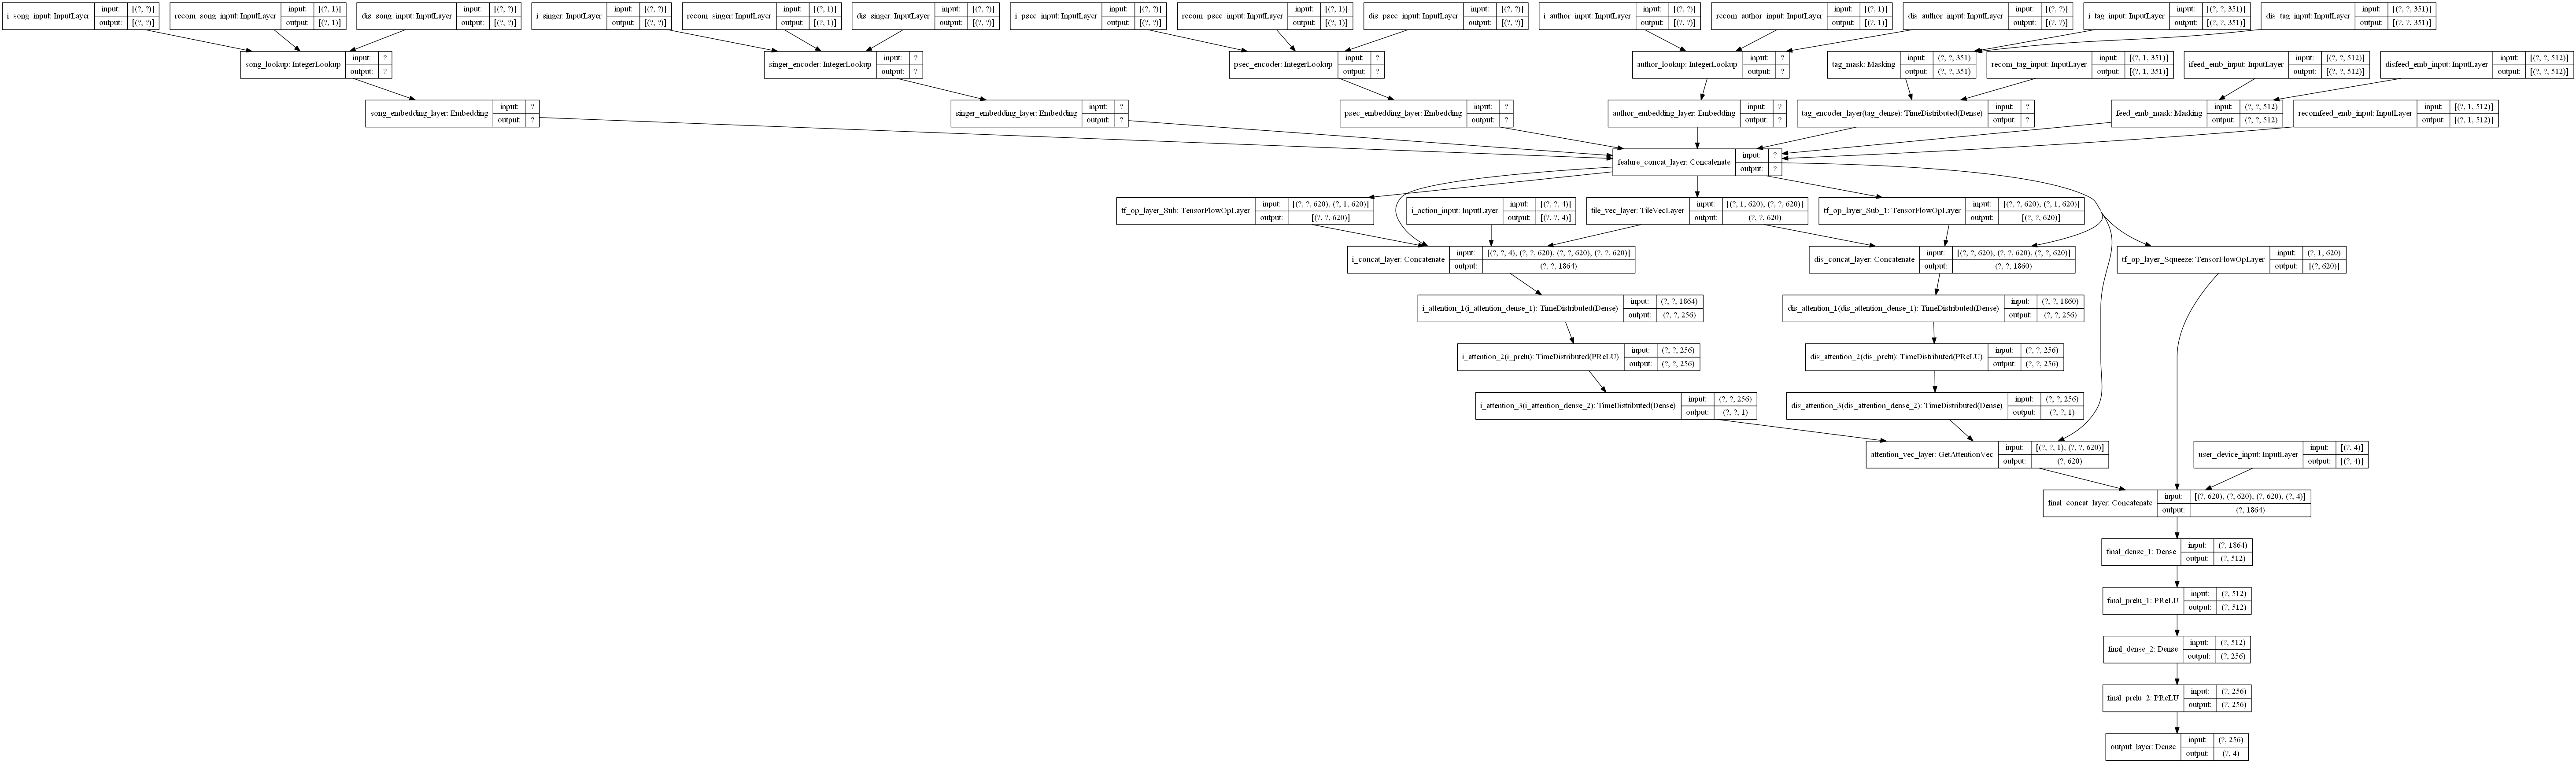

In [16]:
device_input = layers.Input(shape=(4, ), dtype='float32', name='user_device_input')
recom_squeeze_vec = squeeze_vec_layer(recom_feed_vec)
final_concat_layer = layers.Concatenate(name='final_concat_layer')
final_vec = final_concat_layer([i_attention_vec, dis_attention_vec, recom_squeeze_vec, device_input])
action_inference = layers.Dense(units=512, name='final_dense_1')(final_vec)
action_inference = layers.PReLU(name='final_prelu_1')(action_inference)
action_inference = layers.Dense(units=256, name='final_dense_2')(action_inference)
action_inference = layers.PReLU(name='final_prelu_2')(action_inference)
action_inference = layers.Dense(units=4, activation=activations.softmax, name='output_layer')(action_inference)

In [ ]:
My_Model = models.Model(inputs=[i_author_input, dis_author_input, recom_author_input,
                                i_song_input, dis_song_input, recom_song_input,
                                i_singer_input, dis_singer_input, recom_singer_input,
                                i_psec_input, dis_psec_input, recom_psec_input,
                                i_tag_input, dis_tag_input, recom_tag_input,
                                ifeed_emb_input, disfeed_emb_input, recomfeed_emb_input,
                                i_action_input, device_input],
                        outputs=[action_inference],
                        name='My_Model')
print(My_Model.summary())
utils.plot_model(My_Model, show_shapes=True)

In [ ]:
My_Model.compile(optimizer=optimizers.Adam(learning_rate=1e-3),
                 loss=losses.CategoricalCrossentropy(),
                 metrics=[metrics.CategoricalAccuracy()])